# <font color="darkblue"> Prática 01: Perceptron Learning Algorithm (PLA) </font>




### Aluno: Ruy de Morais e Silva
### Matrícula: 20190175695

**Objetivos:**


*   Entender o funcionamento do PLA e dos componentes de aprendizagem.
*   Fixar o conceito de aprendizagem.



**Descrição:**

Crie uma dataset $D$ com 1000 pontos e uma função alvo $f$ para compreender o funcionamento do PLA. Para visualizar os passos do algoritmo, considere $d=2$ e assuma $X=[-1,1]\times[-1,1]$, em que $x\in X$ é escolhido com probabilidade uniforme. Escolha uma reta como função alvo, em que um lado da reta seja mapeado para $+1$ e o outro para $-1$. Gere então pontos aleatórios $x_i$ e obtenha sua classificação $y_i$ a partir da função alvo. Divida os dados em um grupo de treinamento e outro de teste. 

Após a preparação dos dados, crie uma função $PLA()$ que inicia com os pesos todos iguais a zero e, a cada iteração, deixe o algoritmo escolher aleatoriamente um dos pontos com classificação incorreta até que ele convirja. Rode o PLA sobre amostras com $N=10$ e $N=100$, teste a hipótese solução a partir de pontos diferentes (conjunto de teste) daqueles das amostras e responda a seguinte questão:

- Qual o percentual de pontos classificados corretamente para cada hipótese solução? 










# <font color="darkblue"> Solução </font>


###  Preparação dos dos dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

N_PONTOS_TOTAL = 1000

# Criando uma reta aleatória
n1, n2 = np.random.uniform(-1, 1, 2)
p1 = [n1, n2]

n1, n2 = np.random.uniform(-1, 1, 2)
p2 = [n1, n2]

# Coeficiente angular (m = (y2 -y1) / (x2 - x1))
m = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Coeficiente linear (b = y - mx)
b = p1[1] - m*p1[0]
#equação da reta y = a*x + b
#neste momento foi criada a função alvo (aleatória).

X = [] # dataset com os pontos aleatórios que serão gerados
y = [] #label que será criado para cada ponto do dataset

#Neste código, a função alvo é usada para 
#gerar um conjunto de dados com pontos que pertencem a duas classes diferentes (acima e abaixo da reta). 

for i in range(N_PONTOS_TOTAL):
    n1, n2 = np.random.uniform(-1, 1, 2)
    x = [n1, n2]
    X.append(x)
    
    # Funcao alvo
    f_x = m * n1 + b
    
    
    # Mapeia os pontos de acordo com a reta
    if ((aux := np.sign(m*n1 - n2 + b)) != 0):    
        y.append(aux) # Equacao geral da reta

In [2]:
#[x1,x2] e y
for i in range(5):
  print(X[i],"->",y[i])

[0.8150330415438061, -0.27930539184342407] -> -1.0
[-0.8886330764558774, -0.8246089887540975] -> 1.0
[0.02649084209453445, 0.7085451208225608] -> -1.0
[0.1383771642812719, 0.5645216078860398] -> -1.0
[0.3018974534333603, 0.9754621952761398] -> -1.0


### Visualizando o dataset

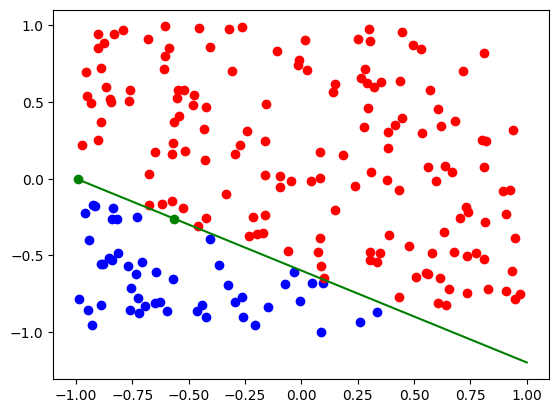

In [3]:
#cria um array de -1 até 1 espaçados em 1000
line = np.linspace(-1, 1, 1000)
plt.plot(line, m*line + b, label="f(x)", c="green") #plota a reta

# Pontos usados na criacao da reta
plt.scatter(p1[0], p1[1], c='green')
plt.scatter(p2[0], p2[1], c='green')

for i in range(len(X[:200])):
    if (y[i] == 1):
        plt.scatter(X[i][0], X[i][1], c='blue')
    else:        
        plt.scatter(X[i][0], X[i][1], c='red')

plt.show()

### Algoritmo PLA

In [4]:
def PLA(X,y):
    #inicia o vetor de peso = 0
    w = [0,0,0] #wo,w1,w2

    X = np.array(X)

    #concatenar os dados com o bias, ou seja [1,X1,X2]
    X = np.insert(X, 0, 1, axis=1)

    ListaPCI_X = X.copy() #lista de pontos classificados incorretamente
    ListaPCI_y = y.copy() #lista de labels dos pontos classificados incorretamente
    iterator = 0

    while len(ListaPCI_X) > 0: #neste while eu preciso reduzir a lista de x e y para os pontos classificados incorretamente

        #escolhe um ponto classificado incorretamente aleatoriamente
        i = random.randint(0,len(ListaPCI_X)-1)

        #atualiza o vetor de peso
        w = w + ListaPCI_y[i] * ListaPCI_X[i]

        #plota a reta formada pelo vetor de peso
        #desconcatenar o bias
        plotGrafico(X[:,1:],w,y,[m,b])

        #atualiza a lista de pontos classificados incorretamente
        ListaPCI_X,ListaPCI_y  = classificadosIncorretamente(X,w,y)
        iterator += 1

    print("numero de iterações ->",iterator)
    return w

### Função para visualização dos passos do PLA

In [5]:
%matplotlib inline
def plotGrafico(data, w, y, f):    
    nPontos = len(data)
    #matplotlib.use('TkAgg')
            
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    plt.axis([-1, 1, -1, 1])

    x_plt = [data[i][0] for i in range(nPontos)]
    y_plt = [data[i][1] for i in range(nPontos)]

    for i in range(nPontos):
        if (y[i] == 1):
            plt.scatter(x_plt[i], y_plt[i], s=10, c='blue')
        else:
            plt.scatter(x_plt[i], y_plt[i], s=10, c='red')

    x = np.linspace(-1, 1, 1000)
    plt.plot(x, f[0]*x + f[1], c='green') # f[0] = m, f[1] = b
    plt.plot(x, (-w[0] - w[1]*x) / w[2], c='orange') # A*x + B*y + C => y = (-C - A*x) / B
    clear_output(wait=True)    
    plt.show(block=False)    
    plt.pause(0.01)   


### Função para construir lista de pontos classificados incorretamente

In [6]:
def classificadosIncorretamente(X, w, y):
    #incorretos_x começa vazio
    incorretos_x = []
    incorretos_y = []

    for i in range(len(X)):
        #vai passar por todo dataset
        x = X[i]

        result = np.dot(w,x)
        result = np.sign(result)

        #verifica se o resultado é diferente do esperado (esta errado)
        if result != y[i]:
            #adiciona o ponto na lista de incorretos_x
            incorretos_x.append(x)
            incorretos_y.append(y[i])

    return incorretos_x, incorretos_y

### Calculando a acurácia

In [7]:
#calcula a acurácia do modelo
def acuracia(X,y,w):

    X = np.array(X)
    X = np.insert(X, 0, 1, axis=1)

    acertos = 0
    for i in range(len(X)):
        x = X[i]
        result = np.dot(w,x)
        result = np.sign(result)
        if result == y[i]:
            acertos += 1
            
    return acertos/len(X) * 100

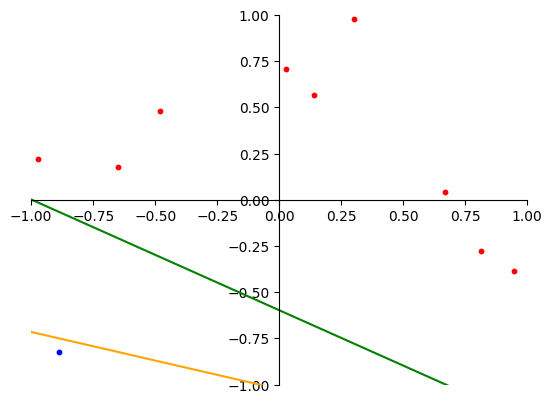

numero de iterações -> 1
Acurácia:  81.51515151515152


In [8]:
#Dividindo o dataset em treino e teste de acordo com o N
N = 10
X_train = X[:N]
y_train = y[:N]
X_test = X[N:]
y_test = y[N:]
print("Tamanho do X_treino e Y_treino: ",len(X_train),len(y_train))
print("Tamanho do X_teste e Y_teste: ",len(X_test),len(y_test))

#treinando o modelo
w = PLA(X_train,y_train)
#avalando o modelo
print("Acurácia: ",acuracia(X_test,y_test,w))

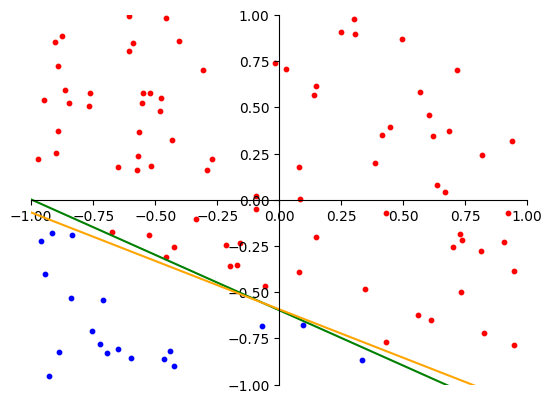

numero de iterações -> 55
Acurácia:  98.77777777777777


In [9]:
N = 100
X_train = X[:N]
y_train = y[:N]
X_test = X[N:]
y_test = y[N:]
print("Tamanho do X_treino e Y_treino: ",len(X_train),len(y_train))
print("Tamanho do X_teste e Y_teste: ",len(X_test),len(y_test))

#treinando o modelo
w = PLA(X_train,y_train)
#avalando o modelo
print("Acurácia: ",acuracia(X_test,y_test,w))